In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [2]:
# Representing LogisticRegression as lr(creating a LogisticRegression object)
lr = LogisticRegression()

In [7]:
netflix_raw = pd.read_csv('netflix_ex.csv')

In [8]:
netflix_raw.head()

,Age,Subscription
0,62,1
1,18,0
2,40,0
3,51,1
4,37,1


In [9]:
netflix_raw.tail()

,Age,Subscription
15,52,1
16,36,0
17,35,0
18,30,0
19,39,0


In [10]:
import statsmodels.api as sm

In [17]:
X = netflix_raw['Age']
y = netflix_raw['Subscription']

X = sm.add_constant(X)

In [12]:
X

0     62
1     18
2     40
3     51
4     37
5     47
6     32
7     49
8     55
9     52
10    52
11    33
12    41
13    44
14    51
15    52
16    36
17    35
18    30
19    39
Name: Age, dtype: int64

In [13]:
y

0     1
1     0
2     0
3     1
4     1
5     1
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    1
15    1
16    0
17    0
18    0
19    0
Name: Subscription, dtype: int64

In [18]:
logit_model = sm.Logit(y, X)

In [19]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.381287
         Iterations 7


In [20]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.446     
Dependent Variable: Subscription     AIC:              19.2515   
Date:               2019-03-25 17:10 BIC:              21.2430   
No. Observations:   20               Log-Likelihood:   -7.6257   
Df Model:           1                LL-Null:          -13.763   
Df Residuals:       18               LLR p-value:      0.00045930
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
         Coef.     Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const   -10.0209     4.2102   -2.3801   0.0173   -18.2728   -1.7690
Age       0.2416     0.0997    2.4242   0.0153     0.0463    0.4370
=================================================================

"""

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.50


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1 3]
 [0 2]]


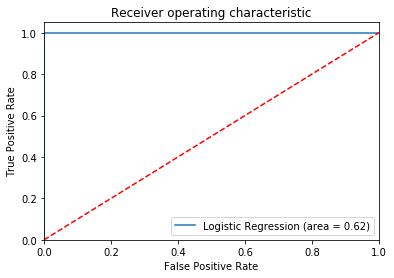

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
logreg.predict_proba(X_test)

array([[0.45483061, 0.54516939],
       [0.57342583, 0.42657417],
       [0.36843609, 0.63156391],
       [0.23596135, 0.76403865],
       [0.25813264, 0.74186736],
       [0.40614444, 0.59385556]])

In [35]:
logreg.predict_proba(X_test)[:,1]

array([0.54516939, 0.42657417, 0.63156391, 0.76403865, 0.74186736,
       0.59385556])

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
y_pred = logreg.predict(X_test)

In [40]:
print(y_pred)

[1 0 1 1 1 1]


In [41]:
print("The accuracy of the logistic regression classifier on the test set is : {:.2f}".format(logreg.score(X_test, y_test)))

The accuracy of the logistic regression classifier on the test set is : 0.50


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1 3]
 [0 2]]


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [46]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

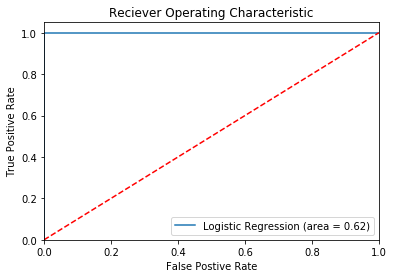

In [47]:
plt.figure()
plt.plot(fpr,tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()